In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive


legitimate_urls = pd.read_csv("data/legitimate-urls.csv")
phishing_urls = pd.read_csv("data/phishing-urls.csv")
urls = legitimate_urls.append(phishing_urls)
# Remove categorical variables
urls = urls.drop(columns=['Domain','Path', 'Protocol'])
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.20, random_state=100)

# Train Model

### Decision Tree Classifier

<img src="images/dct.png">

A decision tree classifer lets you make non-linear decisions, using simple linear questions. What the machine does is to select the best attribute that can split the data and can give as much information as possible. This is how the machine selects the best tree among many. We try to find variables and split the points that make the subsets as pure as possible, therefore with the lowest value of impurity. A decision tree algorithm aims to maximize the information gain. This is how the machine choose which feature to split on.

Let’s say we have a bunch of 12 examples containing two different classes, 6 identified as A and 6 as B. If a node further splits the data into two smaller samples, each one containing 3 units of A and 3 units of B, we can clearly see that we haven’t gained much information compared to before the split. We just have divided the 12 examples into two parts of 6 but the content of each is still “unclear”. We still don’t know which one to choose as they both contain the same amount of A and B.

<img src="images/dct_example.png">

If, instead, the node splits the data in two parts where on one side we have 6 units of A and on the other we have 6 units of B, then we have much clearer information about the data. On one side we have all the As and on the other all the Bs. Therefore we gained the greatest amount of information to properly answer a question (which could be “which side should I go if I want have an A?”).

<img src="images/dct_example2.png">

The entropy on each side of the data is zero. Both are “pure” as they contain examples of the same class (A or B).

In [2]:
model = DecisionTreeClassifier()
model.fit(data_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Predict the result for test data

In [3]:
pred_label = model.predict(data_test)

In [4]:
print(pred_label),print(list(labels_test))

[0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0
 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0

(None, None)

Creating confusion matrix and checking the accuracy

In [5]:
cm = confusion_matrix(labels_test,pred_label)
print(cm)
accuracy_score(labels_test,pred_label)

[[189  22]
 [ 48 144]]


0.826302729528536

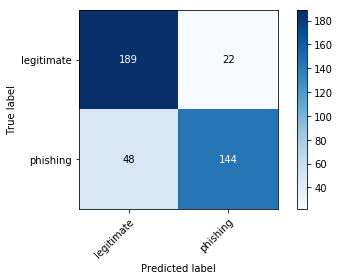

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classes = ['legitimate', 'phishing']
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [7]:
dot_data = tree.export_graphviz(model, out_file=None)
graphviz.Source(dot_data).view()


'Source.gv.pdf'

# Interactive Visualization of Decision Tree

In [8]:
# feature matrix
X = data_test
# target vector
y = labels_test
# class labels
labels = data_train.columns
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0, criterion = crit, splitter = split, max_depth = depth
                                       , min_samples_split=min_split
                                       , min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=labels
                                        , class_names=['legitimate', 'phishing']
                                        , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Exercise 3

Add your own features, play around with parameters see if you can get a better accuracy

# References
1. https://medium.com/machine-learning-bites/machine-learning-decision-tree-classifier-9eb67cad263e